In [1]:
from collections import *
import os
from pprint import pprint
import random
import sys
import time
from typing import *
sys.path.append(os.path.join(os.getcwd(), 'algorithms'))

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
%matplotlib inline

# Asymptotic Analysis

If $f$, $g$ are functions, then informally
 
- $f = O(g)$ Worst-Case (Upper-bound)
    - if eventually $f$ grows slower than some multiple of g
- $f = \Omega(g)$ Best-Case (Lower-bound)
    - if eventually $f$ grows faster than some multiple of g
- $f = \Theta(g)$ Tight-bound
    - if eventually $f$ grows at the same rate as g

## Time Complexity

- $O(1)$: Constant-time algorithm runs in a constant time no matter how large the input is. For example, checking whether the first byte of a file is null `(0x00)` is constant time; no matter how large the file is, we only need to inspect the first byte. As another example, programs that ignore their input and compute the answer to a specific problem are also constant-time, even though this problem might take a very long time.
- $O\left( \log n \right)$: Logarithmic-time algorithm runs in time proportional to the logarithm of the input. The most common example is perhaps binary search: given a sorted array (with random access) of nn elements, we can find whether a specific item is in the array or not by using binary search, dividing the search space by half by checking the middle element.
- $O(n)$: Linear-time algorithm runs in time proportional to the input. This can be good or bad: when $n$ is the number of elements in an array of integers, radix sorting allows us to sort it in linear-time, a very good performance, but when $n$ is a positive integer and we want to check whether it's prime, doing trial division over all numbers $2, 3, \ldots, n-1$ is a poor performance.
- $O(n \log n)$: Often encountered in sorting algorithms, a linearithmic-time algorithm runs in time that's not particularly distinguishable from linear-time for "reasonable" input. Many comparison-based sorting algorithms (merge sort, heap sort, etc.) take linearithmic-time, because it has been proven to be the best running time possible for comparison-based sorting algorithms.
- $O(n^2)$: Quadratic-time algorithms take time proportional to the square of the input. Example algorithms that take this time are schoolbook multiplication of two $n$-digit numbers or two polynomials of degree $n$ (faster algorithms exist, such as Karatsuba's algorithm), some slow sorting algorithms (selection sort and insertion sort), and solving the longest common subsequence problem using dynamic programming.
- $O(n^3)$: The most common cubic-time algorithms are perhaps the running times of schoolbook matrix multiplication (again, faster algorithms exist such as Strassen's algorithm), computing determinant using Gaussian elimination (which can be done using matrix multiplication) and finding a triangle in a graph of nn vertices (which can also be done using matrix multiplication). Other than that, a cubic-time algorithm will likely have the structure of a loop through nn values inside another loop of nn values inside a third loop of nn values; the three examples above naturally give rise to this structure, but it's uncommon to see any other.
- $O(a^n)$: For an exponential-time algorithm, increasing the input by one is enough to multiply the algorithm's running time (by $a$). Note that if $a < b$, then $a^n = o(b^n)$ (they are not asymptotically the same). An example of this is to evaluate whether a Boolean formula on nn variables can be satisfied; trying each possibility requires $2^n$ cases to be checked (multiplied by the time it takes to actually evaluate the formula).
- $O(n!)$: A factorial-time algorithm is even slower. Such algorithms often check every permutation of an array, in which there are $n!$ of them.

Poly-time: When function $f$ grows as a function of $n$

- $n, n^2, log(n)$
- Not poly-time: $2^n$

![img](img/bigo.png)

## Master Theorem

The master theorem provides a solution to recurrence relations of the form

$$T(n)=a T\left(\frac{n}{b}\right)+f(n)$$

for constants **$a \ge 1$ and $b > 1$** with $f$ asymptotically positive, the following statements are true:

- Case 1. If $f(n)=O\left(n^{\log _{b} a-\epsilon}\right)$ for some $\epsilon>0,$ then $T(n)=\Theta\left(n^{\log _{b} a}\right)$
- Case 2. If $f(n)=\Theta\left(n^{\log _{b} a}\right),$ then $T(n)=\Theta\left(n^{\log _{b} a} \log n\right)$
- Case 3. If $f(n)=\Omega(n^{\log_{b}a+\epsilon})$ for some $\epsilon > 0$ (and $af(\frac{n}{b})<=cf(n)$ for some $c < 1$ for all $n$ sufficiently large), then $T(n)=\Theta(f(n))$.


For instance, one can show that runtime of the merge sort algorithm satisfies

$$T(n)=2T\left(\frac{n}{2}\right)+n$$

Similarly, traversing a binary tree takes time

$$T(n)=2T\left(\frac{n}{2}\right)+O(1)$$

By comparing $\log_b{a}$ to the asymptotic behavior of $f(n)$, the master theorem provides a solution to many frequently seen recurrences.


Simply put, if $f(n)$ is polynomially smaller than $n^{\log_b{a}}$, then $n^{\log_b{a}}$ dominates, and the runtime is $\Theta\left(n^{\log_b{a}}\right)$. If $f(n)$ is instead polynomially larger than $n^{\log_b{a}}$, then $f(n)$ dominates, and the runtime is $\Theta\big(f(n)\big)$. Finally, if $f(n)$ and $n^{\log_b{a}}$ are asymptotically the same, then $T(n) = \Theta\left(n^{\log_b{a}} \log{n} \right)$.

Invalid (incorrect) use of Master Theorem

![img](img/master.png)

Reference

- https://brilliant.org/wiki/master-theorem/


## Recurrence Relations

A recurrence relation is an equation that uses recursion to relate terms in a sequence or elements in an array. It is a way to define a sequence or array in terms of itself. Recurrence relations have applications in many areas of mathematics:

- number theory - the Fibonacci sequence
- combinatorics - distribution of objects into bins
- calculus - Euler's method
- and many more.

Recurrence relations are used when an exhaustive approach to problem solving is simply too arduous to be practical. Although it is not ideal to compute the terms in a sequence one at a time by using previous terms, this approach can be much more efficient than the alternative of exhaustive casework.

Sometimes, a recurrence relation can be "solved" by defining the terms of a sequence in terms of its index rather than previous terms in the sequence. This gives a closed form expression for each term in the sequence and eliminates the need for an iterative process to solve for terms in the sequence. There are several ways to accomplish this:

- solving linear recurrence relations
- solving recurrence relations with generating functions
- solving recurrence relations with the substitution method
- solving recurrence relations with the method of summation factors.

Even if a solution of this form is not possible, a recurrence relation is still useful, as it can be used to develop computer algorithms. When terms in a sequence are stored, dynamic programming allows one to compute new terms in a sequence efficiently. Recurrence relations are also applicable for recursive backtracking, in which recursion is used to optimize algorithms.

https://brilliant.org/wiki/recurrence-relations/

# Array, Stack, Queue

In [2]:
from collections import deque
import heapq
from queue import PriorityQueue

In [3]:
q = deque([3, 11, 4, 6, 9, 5, 2, 6, 13])

q.appendleft(100)
print(q.popleft())
q

100


deque([3, 11, 4, 6, 9, 5, 2, 6, 13])

In [4]:
# map heap
h = []
for num in [3, 11, 4, 6, 9, 5, 2, 6, 13]:
    heapq.heappush(h, -num)

for i in range(5):
    print(-heapq.heappop(h))

13
11
9
6
6


In [5]:
# min heap
h = []
for num in [3, 11, 4, 6, 9, 5, 2, 6, 13]:
    heapq.heappush(h, num)

for i in range(5):
    print(heapq.heappop(h))

2
3
4
5
6


In [6]:
q = PriorityQueue()
for num in [3, 11, 4, 6, 9, 5, 2, 6, 13]:
    q.put(num)
    
for i in range(5):
    print(q.get())

2
3
4
5
6



# Linked List

In [7]:
# %load algorithms/linked_list.py

In [8]:
from algorithms.linked_list import Node, LinkedList

ll = LinkedList()
ll.insert(np.random.randint(0, 100, size=20))
print(ll)
ll.reverse()
print('reversed', ll)

35, 17, 98, 17, 63, 80, 27, 28, 68, 47, 97, 28, 51, 63, 30, 33, 81, 1, 80, 41
reversed 41, 80, 1, 81, 33, 30, 63, 51, 28, 97, 47, 68, 28, 27, 80, 63, 17, 98, 17, 35


## Doubly linked list

In [2]:
# %load algorithms/doubly_linked_list.py

In [3]:
from algorithms.doubly_linked_list import Node, DoublyLinkedList

ll = DoublyLinkedList()
ll.insert(np.random.randint(0, 100, size=20))
print(ll)
ll.reverse()
print('reversed', ll)

70, 95, 47, 61, 54, 8, 29, 27, 37, 88, 94, 70, 54, 13, 39, 27, 1, 93, 67, 8
reversed 8, 67, 93, 1, 27, 39, 13, 54, 70, 94, 88, 37, 27, 29, 8, 54, 61, 47, 95, 70


In [4]:
d = DoublyLinkedList()
d.insert_one('www.fasdfads.com')
d.insert_tail('www.aaaa.com')

# Binary Search Tree

In [11]:
# %load algorithms/binary_search_tree.py

In [1]:
from algorithms.binary_search_tree import BinarySearchTree, TreeNode

nums = [3, 5, 1, 1, 4, 6, 8, 5, -4, -2, -8, 6, 8, 5, -4, -2, -8]
tree = BinarySearchTree()
tree.insert(nums)
print(tree)
print('max:', tree.get_max())
print('min:', tree.get_min())

3: (1: (-4: (-8: (None, -8), -2: (-4, -2)), 1), 5: (4, 6: (5: (None, 5), 8: (6, 8))))
max: 8
min: 1


# Binary Tree

In [13]:
# %load algorithms/binary_tree.py

In [14]:
from algorithms.binary_tree import BinaryTree, TreeNode, maxDepth_DFS, invertTree

nums = [3, 5, 1, 1, 4, 6, 8, 5, -4, -2, -8, 6, 8, 5, -4, -2, -8]
tree = BinaryTree()
tree.insert(nums)
d = maxDepth_DFS(tree.root)
print('depth:', d)
print('tree:')
print(tree)
print('inverted tree:')
print(invertTree(tree.root))

depth: 5
tree:
3: (5: (1: (5: (-2, -8), -4), 4: (-2, -8)), 1: (6: (6, 8), 8: (5, -4)))
inverted tree:
3: (1: (8: (-4, 5), 6: (8, 6)), 5: (4: (-8, -2), 1: (-4, 5: (-8, -2))))


# Graph

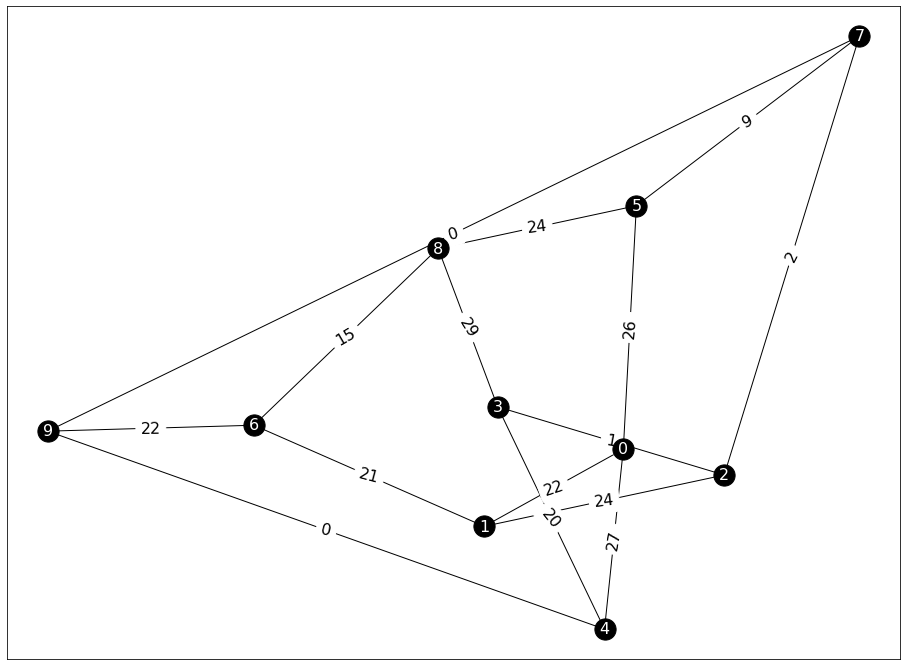

In [130]:
fig, ax = plt.subplots(figsize=(16, 12))

# G = nx.Graph()
# G.add_edge(1, 2, weight=2)
# G.add_edge(1, 3, weight=9)
# nx.draw(G, with_labels=True, ax=ax)

G = nx.petersen_graph()
# G = nx.tutte_graph()
for src, dest in nx.edges(G):
    nx.set_edge_attributes(G, values={(src, dest): random.randint(0, 30)}, name='weight')

pos = nx.spring_layout(G)
# nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edges(G, pos=pos, with_labels=True)
nx.draw_networkx_nodes(G, pos=pos, with_labels=True, node_size=450, node_color='#000000')
nx.draw_networkx_labels(G, pos=pos, with_labels=True, font_size=16, font_color='#FFFFFF')

labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, font_size=16)

plt.draw()

## Definitions

Edges can be directed or undirected

An undirected graph is connected if for every pair of nodes u and v, there is a path between u and v.

- A graph is connected if and only if DFS results in a single tree.
- In a connected graph, an edge $e$ is called a “cut edge” if its removal would disconnect the graph

A graph is strongly connected if every pair of nodes is mutually reachable.

A cycle is a path $v_1, v_2, \dots, v_k$ in which $v_1 = v_k, k > 2,$ and the first $k-1$ nodes are all distinct.

An undirected graph is a tree if it is connected and does not contain a cycle.

- Let $G$ be an undirected graph on $n$ nodes. Any two of the following statements imply the third.
    - $G$ is connected.
    - $G$ does not contain a cycle.
    - $G$ has $n-1$ edges.
    
### Traversal

![img](img/dfs.jpg)

- DFS
    - check if path `s -> t` exists
    - usually implemented recursively
- BFS
    - find shortest path
    - implemented with a dequeue and set to keep track of visited nodes
    
![img](img/bfs.jpg)

## Analysis

- BFS
    - more memory than DFS, but guaranteed to find shortest path if the graph is connected
    - BFS runs in $O(m + n)$ or $O(2m)$ time if the graph is given by its adjacency list representation. $\sum_{u\in V}deg(u)$
- DFS
    - less memory than BFS, will not necessarily find shortest path.
    - A graph is connected if and only if DFS results in a single tree.
    - Running time: $O(m + n)$
    - Subset of edges in DFS that “discover a new node” form a forest (a collection of trees)
    - each tree in the DFS result corresponds to a connected component
- Traverse all neighbors of a node u:
    - Adjacency list: $O(\text{number of neighbors}) = O(deg(u))$
    - Adjacency matrix: $O(n)$
- Check if u and v are connected by an edge
    - Adjacency list: $O(\text{number of neighbors}) = O(deg(u)) \text{ or } O(deg(v))$
    - Adjacency matrix: $O(1)$
- Finding "cut edges"
    1. straightforward
        ```
        for edge in G.edges:
            remove edge from G
            check if G is connected (running DFS for example)
            
        ``` 
        - $O(m^2)$ running time
    2. we can do better
        ```
        # run DFS on graph G
        for edge in DFStree:
            remove edge from graph G
            check if G is disconnected (using DFS)
        ```
        - $O(nm)$ running time
- Determine if graph $G$ is strongly connected
    - $O(m + n)$ time
    - algo
        1. pick any node $s$
        2. run BFS from s in $G$
        3. run BFS from s in $G^{rev}$, a graph with reverse orientation of every edge in $G$
        4. return True if and only if all nodes reached in both BFS executions

## Graph Representations


    edges = [(0, 1), (0, 2), (0, 3), (2, 4), (1, 4)]


### Adjacency Matrix

Matrix $A\in n \times n$ where $A_{uv} = 1$ if $(u, v)$ is an edge, otherwise 0.
- two representation of each edge
- diagonally symmetric if undirected graph, assymetrix if directed graph
- space proportional to $n^2$ or $O(|V|^2)$
    - i.e. $|V|=$ number of nodes
- checking if $(u, v) \in A$ takes $\theta(1)$ time
- identifying all edges takes $\theta(n^2)$
- for directed graphs, $A_{ij}$ represent an edge going from node i to j


    [0, 1, 1, 1, 0]
    [1, 0, 0, 0, 1]
    [1, 0, 0, 0, 1]
    [1, 0, 0, 0, 0]
    [0, 1, 1, 0, 0]
    
### Adjacency List

Node indexed array of lists.
- two representation of each edge
- space proportional to $m + n$ or $O(|V|+|E|)$
- checking if $(u, v) \in A$ takes $O(deg(u))$ time, where $deg(u)=$ number of nodes (vertices) connected to $u$
- identifying all edges takes $\theta(m + n)$ time


    0: [1, 2, 3]
    1: [0, 4]
    2: [0, 4]
    3: [0]
    4: [1, 2]

In [15]:
# %load algorithms/graph.py

In [16]:
from algorithms.graph import Graph

edges = [(0, 1), (0, 2), (0, 3), (2, 4), (1, 4)]
directed = False
graph = Graph.from_edges(edges, directed)
print('directed:', directed)
print('adjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print('\nadjacency list')
adj_list = graph.get_adjacency_list()
for i, row in enumerate(adj_list):
    print(f'{i}: {row}')

directed: False
adjacency matrix
[0, 1, 1, 1, 0]
[1, 0, 0, 0, 1]
[1, 0, 0, 0, 1]
[1, 0, 0, 0, 0]
[0, 1, 1, 0, 0]

adjacency list
0: [1, 2, 3]
1: [0, 4]
2: [0, 4]
3: [0]
4: [1, 2]


In [17]:
directed = True
graph = Graph.from_edges(edges, directed)
print('directed:', directed)
print('adjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print('\nadjacency list')
adj_list = graph.get_adjacency_list()
for i, row in enumerate(adj_list):
    print(f'{i}: {row}')

directed: True
adjacency matrix
[0, 1, 1, 1, 0]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 1]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0]

adjacency list
0: [1, 2, 3]
1: [4]
2: [4]
3: []
4: []


## Directed Acyclic Graph (DAG)

- A DAG is a directed graph that contains no directed cycles.
- if $e\in E$ and $e = (u, v)$, then `u -> v` path dependency exists (Precedence constraints)
- if graph $G$ has a topological order, then $G =$ DAG, vice versa
- if graph $G$ is a DAG, then $G$ has one or more nodes that have no incoming edges

### Topological Order

A topological order of a directed graph $G = (V, E)$ is an ordering of its nodes as $v_1, v_2, \dots, v_k$ such that we have $i < j$ $\forall e(v_i, v_j) \in E$
- in other words: for every edge $e$ from $v_i$ to $v_j$, $i$ is less than $j$)
- mental image: all edges pointing from left to right. $v_1$ doesn't have to necessarily be the only source node, multiple nodes can have no incoming edges
- time complexity: $O(m + n)$
- applications
    - course prerequisite graph
    - workflow management (Airflow)


## Misc

### Transitive Closure

The transitive closure graph of $G$ is a graph $G’$:

- with the same vertices as $G$, and
- with an edge between all pairs of nodes that are connected by a path in $G$

### Bipartite Graphs

An undirected graph $G = (V, E)$ is bipartite if the nodes can be colored red or blue such that every edge connects a red node and a blue node

- Applications
    - stable marriage (stable matching?)
    - scheduling: machines = red, jobs = blue
- testing bipartiteness
    - Many graph problems become:
        - easier if the underlying graph is bipartite (matching)
        - tractable if the underlying graph is bipartite (independent set)
    - If a graph $G$ is bipartite, then it cannot contain an odd length cycle.

## Weighted Graph Link

- [Weighted Graph](#Weighted-graph)
- [Dijkstra's Algorithm](#Dijkstra's-Algorithm)
- [Bellman Ford Algorithm](#Bellman-Ford-Algorithm)
- [Prim's Algorithm](#Prim's-Algorithm)
- [Ford-Fulkerson Algorithm](#Ford-Fulkerson-Algorithm)

# Greedy Algorithms

> A greedy algorithm is an algorithm that follows the problem solving heuristic of making the **locally optimal** choice at each stage with the hope of finding a **global optimum**.

Typical problems

- Coin change problem
    - Given a set of coins, $c=\{5, 10, 20, 50\}$, and an amount of change, $x$, find the smellest collection of coins which add up to the change
- Conversion from decimal to binary, vice versa
- Interval Scheduling
- [Dijkstra's Shortest Path](#Dijkstra's-Shortest-Path)
- Clustering

Some other places where a greedy algorithm gets you the best solution:

- Trying to fit as many overlapping meetings as possible in a conference room? At each step, schedule the meeting that *ends* earliest.
- Looking for a minimum spanning tree in a [graph](https://www.interviewcake.com/concept/graph)? At each step, greedily pick the cheapest edge that reaches a new vertex.

**Careful: sometimes a greedy algorithm *doesn't* give you an optimal solution:**

- [When filling a duffel bag with cakes of different weights and values](https://www.interviewcake.com/question/cake-thief), choosing the cake with the highest value per pound doesn't always produce the best haul.
- To find the cheapest route visiting a set of cities, choosing to visit the cheapest city you haven't been to yet doesn't produce the cheapest overall itinerary.

Inversions

An inversion in schedule $S$ is a pair of jobs $(i, k)$ such that $i < k$ (by deadline) but $k$ is scheduled before $i$.

![img](img/inversion.png)

Greedy algorithm doesn't create inversions

## Coin Change

In [18]:
def coinChange(c: List, x: int) -> int:
    cur = c.pop()
    change = 0
    while x > 0:
        if x >= cur:
            print(cur)
            x -= cur
            change += 1
        else:
            cur = c.pop()
            
    return change

c = [1, 5, 10, 25, 50]
x = 95
coinChange(c, x)

50
25
10
10


4

1. Choose the largest coin less than the amount $x$
2. Subtract the value of coin from $x$
3. Repeat until amount = 0

- may not work depending on the set $c$
- Will always work if each coin is an integer multiple of the next smallest denomination e.g. $c=\{40, 20, 10, 1\}$
    - Proof: Can always replace multiple lower denominations (e.g. 2x20c) with fewer higher denominations (1x40c), so the lower denominations will only add up to at most one less than a higher denomination (e.g. there is at most 1x20c, 1x10c, and 9x1c)

## Interval Scheduling

In [19]:
# https://leetcode.com/problems/non-overlapping-intervals/discuss/276056/Python-Greedy-Interval-Scheduling

"""
Given a collection of intervals, find the minimum number of intervals 
you need to remove to make the rest of the intervals non-overlapping.
"""

def eraseOverlapIntervals(intervals):
	end, cnt = float('-inf'), 0
	for i in sorted(intervals, key=lambda x: x[1]):
		if i[0] >= end: 
			end = i[1]
		else: 
			cnt += 1
	return cnt

assert eraseOverlapIntervals([[1,2],[1,2],[1,2]]) == 2

The heuristic is: always pick the interval with the earliest end time. Then you can get the maximal number of non-overlapping intervals. (or minimal number to remove).
This is because, the interval with the earliest end time produces the maximal capacity to hold rest intervals.

E.g. Suppose current earliest end time of the rest intervals is `x`. Then available time slot left for other intervals is `[x:]`. If we choose another interval with end time `y`, then available time slot would be `[y:]`. Since `x ≤ y`, there is no way `[y:]` can hold more intervals then `[x:]`. Thus, the heuristic holds.

Therefore, we can sort interval by ending time and key track of current earliest end time. Once next interval's start time is earlier than current end time, then we have to remove one interval. Otherwise, we update earliest end time.

- Time complexity is $O(nlog(n))$ as sort overwhelms greedy search.

## Minimum Spanning Tree

Given a connected graph $G = (V, E)$ with real-valued edge weights $c_e$ , a MST is a subset of the edges $T\subseteq E$ such that $T$ is a spanning tree whose sum of edge weights is minimized.

![img](img/mst.png)

![img](img/mst2.png)

Cayley's Theorem. There are $n^{n-2}$ spanning trees of $K_n$. Therefore this cannot be solved by brute force.

Greedy Algorithms to find MST

- Reverse-Delete algorithm
    - Start with $T = E$. Consider edges in descending order of cost. Delete edge $e$ from $T$ unless doing so would disconnect $T$.
- Prim's algorithm
    - Start with some root node $s$ and greedily grow a tree $T$ from $s$ outward. At each step, add the cheapest edge $e$ to $T$ that has exactly one endpoint in $T$
    - Time Complexity: $O(|V|^2)$ assuming adjacency matrix
- Kruskal's Algorithm
    – Start with $T = \emptyset$. Consider edges in ascending order of cost. Insert edge $e$ in $T$ unless doing so would create a cycle.

Reference
- https://peades.com/sketchbook/mst/mst.html
- https://www.programiz.com/dsa/prim-algorithm
- https://www.programiz.com/dsa/kruskal-algorithm

Related
- [Graph](#Graph)
- [Prim's Algorithm](#Prim's-Algorithm)

# Divide and Conquer

- Break up problem into several parts.
- Solve each part recursively.
- Combine solutions to sub-problems into overall solution.

Steps

- Break up problem of size $n$ into two equal parts of size $\frac{n}{2}$.
- Solve two parts recursively.
- Combine two solutions into overall solution in linear time.

Use case
- Sorting
- Binary Search
- BST
- Closest pair of points - Given $n$ points in the plane, find a pair with smallest Euclidean distance between them
- Karatsuba Multiplication

Runtime: $O(n \log n)$

Time: $T(\frac{n}{2})+O(1)$

## Sort

- Merge sort
    - steps
        1. Divide array into two halves
        2. Recursively sort each half
        3. Merge two halves to make sorted whole
    - $T(n) = O(n \log_{2}n)$

## Find closest pair of points

Given a list of $n$ points of form $(i, j)$ in a 2D plane, find a pair with smallest Euclidean distance between them.

Algorithm
1. Divide: Divide the plane in roughly half
2. Conquer: Find closest pair in each sides recursively
3. Combine: Find closest pair with one point in each side
    - Only need to consider points located less than $min(d_L, d_R)$ distance from the border drawn in #1, where $d_L,d_R$ are the distances between the closest pair of points in each side.
4. Return best of 3 solutions

Analysis

$$T(n) \le 2T(\frac{n}{2})+O(n \log n) \rightarrow T(n) = O(n \log^{2}n)$$



## Karatsuba Multiplication

In [20]:
def karat(x,y):
    if len(str(x)) == 1 or len(str(y)) == 1:
        return x*y
    else:
        m = max(len(str(x)),len(str(y)))
        m2 = m // 2

        a = x // 10**(m2)
        b = x % 10**(m2)
        c = y // 10**(m2)
        d = y % 10**(m2)

        z0 = karat(b,d)
        z1 = karat((a+b),(c+d))
        z2 = karat(a,c)

        return (z2 * 10**(2*m2)) + ((z1 - z2 - z0) * 10**(m2)) + (z0)

## Majority Element

https://leetcode.com/problems/majority-element/

Given an array of size n, find the majority element. The majority element is the element that appears more than ⌊ n/2 ⌋ times.

You may assume that the array is non-empty and the majority element always exist in the array.

    Example 1:
    Input: [3,2,3]
    Output: 3
    
    Example 2:
    Input: [2,2,1,1,1,2,2]
    Output: 2


### Intuition

If we know the majority element in the left and right halves of an array, we can determine which is the global majority element in linear time.

### Algorithm

Here, we apply a classical divide & conquer approach that recurses on the left and right halves of an array until an answer can be trivially achieved for a length-1 array. Note that because actually passing copies of subarrays costs time and space, we instead pass `lo` and `hi` indices that describe the relevant slice of the overall array. In this case, the majority element for a length-1 slice is trivially its only element, so the recursion stops there. If the current slice is longer than length-1, we must combine the answers for the slice's left and right halves. If they agree on the majority element, then the majority element for the overall slice is obviously the samee. If they disagree, only one of them can be "right", so we need to count the occurrences of the left and right majority elements to determine which subslice's answer is globally correct. The overall answer for the array is thus the majority element between indices $0$ and $n$.

### Complexity Analysis

Time complexity : $O(n \log n)$

Each recursive call to `majority_element_rec` performs two recursive calls on subslices of size $\frac{n}{2}$ and two linear scans of length $n$. Therefore, the time complexity of the divide & conquer approach can be represented by the following recurrence relation:

$T(n) = 2T(\frac{n}{2}) + 2n$

By the [master theorem](#Master-Theorem), the recurrence satisfies case 2, so the complexity can be analyzed as such:

$\begin{aligned} T(n) &= \Theta(n^{log_{b}a}\log n) \\ &= \Theta(n^{log_{2}2}\log n) \\ &= \Theta(n \log n) \\ \end{aligned}$ 

Space complexity : $O(\log n)$

Although the divide & conquer does not explicitly allocate any additional memory, it uses a non-constant amount of additional memory in stack frames due to recursion. Because the algorithm "cuts" the array in half at each level of recursion, it follows that there can only be $O(\log n)$ "cuts" before the base case of 1 is reached. It follows from this fact that the resulting recursion tree is balanced, and therefore all paths from the root to a leaf are of length $O(\log n)$. Because the recursion tree is traversed in a depth-first manner, the space complexity is therefore equivalent to the length of the longest path, which is, of course, $O(\log n)$.

In [6]:
class Solution:
    def majorityElement(self, nums, lo=0, hi=None):
        def majority_element_rec(lo, hi):
            # base case; the only element in an array of size 1 is the majority
            # element.
            if lo == hi:
                return nums[lo]

            # recurse on left and right halves of this slice.
            mid = (hi-lo)//2 + lo
            left = majority_element_rec(lo, mid)
            right = majority_element_rec(mid+1, hi)

            # if the two halves agree on the majority element, return it.
            if left == right:
                return left

            # otherwise, count each element and return the "winner".
            left_count = sum(1 for i in range(lo, hi+1) if nums[i] == left)
            right_count = sum(1 for i in range(lo, hi+1) if nums[i] == right)

            return left if left_count > right_count else right

        return majority_element_rec(0, len(nums)-1)

In [7]:
assert Solution().majorityElement([2,2,1,1,1,2,2]) == 2

# Dynamic Programming

Dynamic programming refers to a problem-solving approach, in which we precompute and store simpler, similar subproblems, in order to build up the solution to a complex problem. 
It is similar to recursion, in which calculating the base cases allows us to inductively determine the final value. 
This bottom-up approach works well when the new value depends only on previously calculated values.

An important property of a problem that is being solved through dynamic programming is that it should have overlapping subproblems. 
This is what distinguishes DP from divide and conquer in which storing the simpler values isn't necessary.

Dynamic Programming Prerequisites/Restrictions
- Optimal substructure — optimal solution can be constructed from optimal solutions of its subproblems
- Overlapping sub-problems — problem can be broken down into subproblems which are reused several times or a recursive algorithm for the problem solves the same subproblem over and over rather than always generating new subproblems

Dynamic Programming Problems

- Egg Dropping: What is the best way to drop nn eggs from an m-floored building to figure out the lowest height from which the eggs when dropped crack?
- Subset Sum Problem: Given a set and a value n, is there a subset the sum of whose elements is n?
- [Fibonacci Numbers](#n-th-Fibonacci): Is there a better way to compute Fibonacci numbers than plain recursion?
- [Maximum Subarray](#Maximum-Subarray)
- [Coin Change](#Coin-Change)
- [Knapsack Problem](#Knapsack-Problem): Given a set of treasures with known values and weights, which of them should you pick to maximize your profit whilst not damaging your backpack which has a fixed capacity?
- [Longest Increasing Subsequence](#Longest-Increasing-Subsequence)
- [Longest Common Subsequence](#Longest-Common-Subsequence): Given two sequences, which is the longest subsequence common to both of them?

Approaches

- Memoization (top-down cache filling) refers to the technique of caching and reusing previously computed results. The memoized fib function would thus look like this:
    ```
    memFib(n) {
        if (mem[n] is undefined)
            if (n < 2) result = n
            else result = memFib(n-2) + memFib(n-1)
            mem[n] = result
        return mem[n]
    }
    ```
- DP Table Tabulation (bottom-up cache filling) is similar but focuses on filling the entries of the cache. Computing the values in the cache is easiest done iteratively. The tabulation version of fib would look like this:
    ```
    tabFib(n) {
        mem[0] = 0
        mem[1] = 1
        for i = 2...n
            mem[i] = mem[i-2] + mem[i-1]
        return mem[n]
    }
    ```
    
Steps in DP

1. Find a recursive relation. If you are already have your recursive relation, go to the implementation stage which starts from (4). Read the problem carefully, and find out if you could divide the problem into sub‐problems. The most important thing for the dynamic programming pattern is that you should prove that the solution of the higher‐level problem expressed in optimal solutions of the sub‐ problems is optimal. This part might be tough; if you can’t figure out a recursive relation, try the divide‐and‐conquer pattern or the backtrack, branch‐and‐bound pattern. By doing that you might find a recursive relation between sub‐problems.
2. What is the answer of the problem? Now express your global optimal solution in terms of the recursive relation that you found in the previous stage (1).
3. Try an example to verify the recursive relation. You might have got the recursive relation wrong. Try a simple example by walking through the recursion, and do the math. You would get an insight whether your relation is right or wrong.
4. Express the recursive relation top­down. Write down code that executes the recursive relation that you have found. First write down the trivial cases (i.e. boundary cases), and then make the top level function using the previous function.
5. Use memoization to eliminate redundancy. After writing down the recursion, you will see that the program is doing the same computation over and over again. Introduce an array that saves the intermediate results. First search the array, and if the value is already there return that value, if not, enter the recursive function to calculate the solution.
6. Express the recursive relation bottom­up. The top‐down approach divides the problem top to bottom, and after hitting the trivial cases (i.e., boundary cases) it climbs up the ladder. The bottom‐up approach starts from the trivial cases and goes up. By writing a bottom‐up approach, you basically save the overhead of function calls. This might be the fastest version among your three versions of code.
7. Parallelize. Even you did up to (6) and it takes too long to compute the global optimal solution, you have two choices. 1) Find a more efficient recursive relation in terms of time complexity which starts from step (1), or 2) parallelize your program.

## n-th Fibonacci 

- `fib1()`: top-down DP with memoization using LRU-Cache and recursion
    - Time complexity: $O(n)$
    - Space complexity: $O(n)$
- `fib2()`: bottom-up DP with memoization
    - Time complexity: $O(n)$
    - Space complexity: $O(n)$
- `fib3()`: bottom-up DP with memoization and constant space
    - Time complexity: $O(n)$
    - Space complexity: $O(1)$

In [14]:
# top-down DP with memoization using LRU-Cache
from functools import lru_cache

@lru_cache(maxsize=None)
def fib1(n: int) -> int:
    if n <= 2:
        num = 1
    else:
        num = fib1(n-1) + fib1(n-2)
    return num

# bottom-up DP
def fib2(n: int) -> int:
    fib = {}

    for k in range(1, n+1):
        if k <= 2:
            num = 1
        else:
            num = fib[k-1] + fib[k-2]

        fib[k] = num
    return fib[n]

# bottom-up DP constant space
def fib3(n: int) -> int:
    fib = {}

    for k in range(1, n+1):
        if k <= 2:
            num = 1
        else:
            num = fib[k-1] + fib[k-2]
            del fib[k-2]
        
        fib[k] = num
    return fib[n]

n = 20
assert fib1(n) == fib2(n) == fib3(n)

## Maximum Subarray

[Maximum Subarray - LeetCode](https://leetcode.com/problems/maximum-subarray/)

Given an integer array nums, find the contiguous subarray (containing at least one number) which has the largest sum and return its sum.

    Example:

    Input: [-2, 1, -3, 4, -1, 2, 1, -5, 4]
    Output: 6
    Explanation: [4,-1,2,1] has the largest sum = 6.

### Kadane's Algorithm

Kadane's algorithm
Kadane's algorithm scans the given array ${\displaystyle A[1...n]}$ from left to right. In the ${\displaystyle j}$th step, it computes the subarray with the largest sum ending at ${\displaystyle j}$; this sum is maintained in variable `current_max`. Moreover, it computes the subarray with the largest sum anywhere in ${\displaystyle A[1\dots j]}$, maintained in variable `global_max`, and easily obtained as the maximum of all values of current_sum seen so far

In [35]:
def max_subarray(nums):
    """Find the largest sum of any contiguous subarray."""
    current_max = nums[0]
    global_max = nums[0]
    
    for i in range(1, len(nums)):
        current_max = max(nums[i], nums[i] + current_max)
        global_max = max(global_max, current_max)
    return global_max


assert max_subarray([-2, 1, -3, 4, -1, 2, 1, -5, 4]) == 6

## Coin Change

[Coin Change - LeetCode](https://leetcode.com/problems/coin-change/)

You are given coins of different denominations and a total amount of money amount. Write a function to compute the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

Solution: Assume `dp[i]` is the fewest number of coins making up amount i, then for every coin in coins, `dp[i] = min(dp[i - coin] + 1)`.

In [219]:
class Solution(object):
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [float('inf')] * (amount + 1)
        dp[0] = 0
        
        for i in range(1, amount+1):
            for coin in coins:
                if i - coin >= 0:
                    dp[i] = min(dp[i], dp[i-coin] + 1)
        if dp[-1] == float('inf'):
            return -1
        
        print(dp)
        return dp[-1]


coins = [1, 2, 5]
amount = 11
assert Solution().coinChange(coins, amount) == 3

[0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]


## Knapsack Problem

Given a knapsack that can carry $W$ units of weight and a set of $n$ items $S=(V, W)$, where $v_i$ is the value and $w_i$ is the weight of item $S_i$. The quantity of each items are unbounded. The challenge is to maximize the value of items that we could carry using the bag. If we use qi to indicate the quantity of each item, the problem could be rephrased as following:

$$\text{Maximize } \sum_{i=1}^{n} v_{i} q_{i},\text{ subject to }\sum_{i=1}^{n} w_{i} q_{i} \leq W$$

In [84]:
v = [1, 6, 18, 22, 28]
w = [1, 2, 5, 6, 7]
W = 11

df = pd.DataFrame({'values': v, 'weights': w})
df.transpose()

,0,1,2,3,4
values,1,6,18,22,28
weights,1,2,5,6,7


In [116]:
def knapsack(values, weights, lim):
    dp = [-1] * (lim + 1)
    dp[0] = 0
    global_max = 0

    for i in range(1, lim + 1):
        local_max = 0
        for j in range(len(values)):
            if weights[j] <= i:
                local_max = max(local_max, values[j] + dp[i - weights[j]])
        dp[i] = local_max
        global_max = max(global_max, local_max)

    return dp, global_max

dp, global_max = knapsack(v, w, W)
assert global_max == 40

In [117]:
idx = np.arange(len(dp), dtype=int)
df = pd.DataFrame({'weight': idx, 'max_value': dp})
print('DP Table')
df.transpose()

DP Table


,0,1,2,3,4,5,6,7,8,9,10,11
weight,0,1,2,3,4,5,6,7,8,9,10,11
max_value,0,1,6,7,12,18,22,28,29,34,36,40


In [118]:
def knapsack(values, weights, lim):
    dp = [[0] * (lim + 1) for i in range(len(values) + 1)]

    for i in range(1, len(values) + 1):
        for j in range(1, lim + 1):
            if weights[i-1] > j:
                dp[i][j] = dp[i-1][j]
            else:
                dp[i][j] = max(dp[i-1][j], values[i-1] + dp[i-1][j-weights[i-1]])
    return dp

dp = knapsack(v, w, W)
assert dp[-1][-1] == 40

Text(0.5, 1.0, 'Knapsack Problem DP Table')

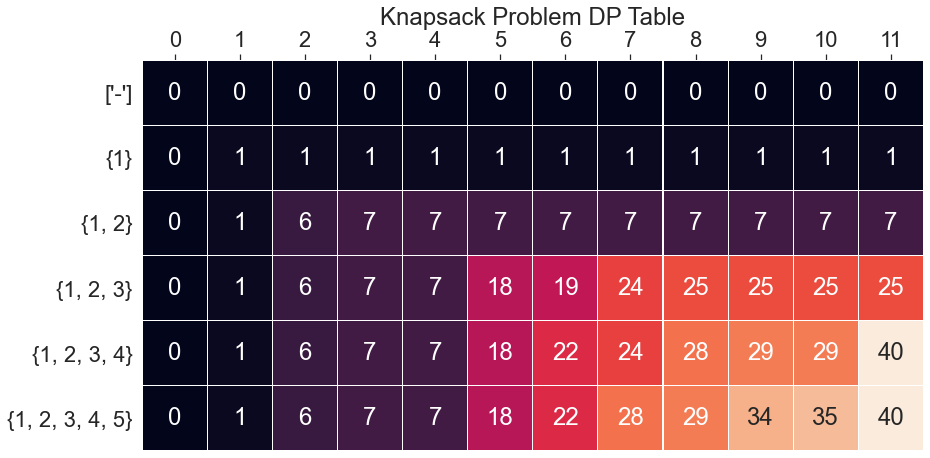

In [119]:
df = pd.DataFrame(dp)
df.index = [['-']] + ["{" + ", ".join(map(str, range(1, i))) + "}" for i in range(2, len(v)+2)]

fig, ax = plt.subplots(figsize=(14, 14))
g = sns.heatmap(df, annot=True, linewidths=.2, ax=ax, square=True, cbar=False)
ax.xaxis.set_ticks_position('top')
sns.set(font_scale=2)
plt.title('Knapsack Problem DP Table')

`dp[i][j]` = Max value in backpack given weight capacity `j` and itemset `items[:i]`

$$\text{Recurrence: localmax = }max \left( \text{localmax, values}[j] + dp[i - \text{weights}[j]] \right) $$

## Weighted Interval scheduling

Given a list of jobs, each having start time, end time and value, find the maximum value subset of mutually compatible jobs.

    jobs = [(0, 6, 1), (1, 4, 10), (3, 5, 5), (3, 8, 8), (4, 7, 15), (5, 9, 12), (6, 10, 17), (8, 11, 4)]

In [82]:
import bisect

def compute_previous_intervals(jobs: List[Tuple]):
    '''
    For every interval j, compute the rightmost mutually compatible interval i, where i < j
    
    input:
        jobs: list of jobs sorted by earliest finish time
    '''
    start = [job[0] for job in jobs]
    finish = [job[1] for job in jobs]

    p = []
    for j in range(len(jobs)):
        i = bisect.bisect_right(finish, start[j]) - 1 # rightmost interval f_i <= s_j
        p.append(i)

    return p

def compute_solution(jobs, OPT, p, ret, j):
    if j >= 0:  # will halt on OPT[-1]
        if jobs[j][-1] + OPT[p[j]] > OPT[j - 1]:
            ret += jobs[j],
            compute_solution(jobs, OPT, p, ret, p[j])
        else:
            compute_solution(jobs, OPT, p, ret, j - 1)
    return ret

def findMaxSubsetJobs(jobs):
    jobs.sort(key=lambda x: x[1])
    p = compute_previous_intervals(jobs)
    
    # compute OPTs iteratively in O(n), here we use DP
    OPT = defaultdict(int)
    OPT[-1] = 0
    OPT[0] = 0
    for j in range(1, len(jobs)):
        OPT[j] = max(jobs[j][-1] + OPT[p[j]], OPT[j - 1])
        
    # given OPT and p, find actual solution intervals in O(n)
    ret = []
    ret = compute_solution(jobs, OPT, p, ret, len(jobs) - 1)

    return sorted(ret, key=lambda x: x[1])

In [83]:
jobs = [(0, 6, 1), (1, 4, 10), (3, 5, 5), (3, 8, 8), (4, 7, 15), (5, 9, 12), (6, 10, 17), (8, 11, 4)]
findMaxSubsetJobs(jobs)

[(1, 4, 10), (3, 5, 5), (0, 6, 1), (4, 7, 15), (3, 8, 8), (5, 9, 12), (6, 10, 17), (8, 11, 4)]
[-1, -1, -1, 0, -1, 1, 2, 4]


[(3, 5, 5), (6, 10, 17)]

$$\text{Recurrence:} OPT[j] = max \left(values[j] + OPT[p[j]], OPT[j-1]\right) $$

## Longest Increasing Subsequence

[Longest Increasing Subsequence - LeetCode](https://leetcode.com/problems/longest-increasing-subsequence/)

Given an unsorted array of integers, find the length of longest increasing subsequence.

    Example:

    Input: [10,9,2,5,3,7,101,18]
    Output: 4 
    Explanation: The longest increasing subsequence is [2,3,7,101], therefore the length is 4. 

Note:

- There may be more than one LIS combination, it is only necessary for you to return the length.
- Your algorithm should run in $O(n^2)$ complexity.
- Follow up: Could you improve it to $O(n \log n)$ time complexity?

In [7]:
class Solution:
    def lengthOfLIS(self, nums: List[int]) -> int:
        if not nums:
            return 0

        dp = [1] * len(nums)

        for i in range (1, len(nums)):
            for j in range(i):

                if nums[i] > nums[j]:
                    dp[i] = max(dp[i], dp[j]+1)

        return dp
    

# nums = [10,9,2,5,3,7,101,18]
nums = [23,9,15,11,19,27,21,25,31,17]
dp = Solution().lengthOfLIS(nums)
# assert max(dp) == 4
max(dp)

df = pd.DataFrame({'nums': nums, 'LIS': dp})
print('DP Table')
df.transpose()

DP Table


,0,1,2,3,4,5,6,7,8,9
nums,23,9,15,11,19,27,21,25,31,17
LIS,1,1,2,2,3,4,4,5,6,3


### Recurrence

    dp[i] = max(dp[i], dp[j]+1) if nums[i] > nums[j]

For notational simplicity, let $A[1, i]$ denote the first $i$ elements of the array. Let
$OPT(i)$ denote the length of a LIS of $A[1, i]$ that ends at position $i$. We claim that $OPT(i)$ satisfies
this recurrence:

![img](img/lis.png)

## Longest Common Subsequence

[Longest Common Subsequence - LeetCode](https://leetcode.com/problems/longest-common-subsequence/)

Given two strings text1 and text2, return the length of their longest common subsequence.

A subsequence of a string is a new string generated from the original string with some characters(can be none) deleted without changing the relative order of the remaining characters. (eg, "ace" is a subsequence of "abcde" while "aec" is not). A common subsequence of two strings is a subsequence that is common to both strings. If there is no common subsequence, return 0.

    Example 1:
    Input: text1 = "abcde", text2 = "ace" 
    Output: 3  
    Explanation: The longest common subsequence is "ace" and its length is 3.
    
    Example 2:
    Input: text1 = "abc", text2 = "abc"
    Output: 3
    Explanation: The longest common subsequence is "abc" and its length is 3.
    
    Example 3:
    Input: text1 = "abc", text2 = "def"
    Output: 0
    Explanation: There is no such common subsequence, so the result is 0. 

Constraints:

- `1 <= text1.length <= 1000`
- `1 <= text2.length <= 1000`
- The input strings consist of lowercase English characters only.

In [47]:
class Solution:
    def longestCommonSubsequence(self, text1: str, text2: str):
        dp = [[0] * (len(text2) + 1) for _ in range(len(text1) + 1)]
        
        for i in range(len(text1)):
            for j in range(len(text2)):
                if text1[i] == text2[j]:
                    dp[i + 1][j + 1] = 1 + dp[i][j]
                else:
                    dp[i + 1][j + 1] = max(dp[i][j + 1], dp[i + 1][j])
        return dp
    

text1 = "hydromagnetics"
text2 = "hydropneumatic" 
dp = Solution().longestCommonSubsequence(text1, text2)
assert dp[-1][-1] == 10

Text(0.5, 1.0, 'LCS DP Table')

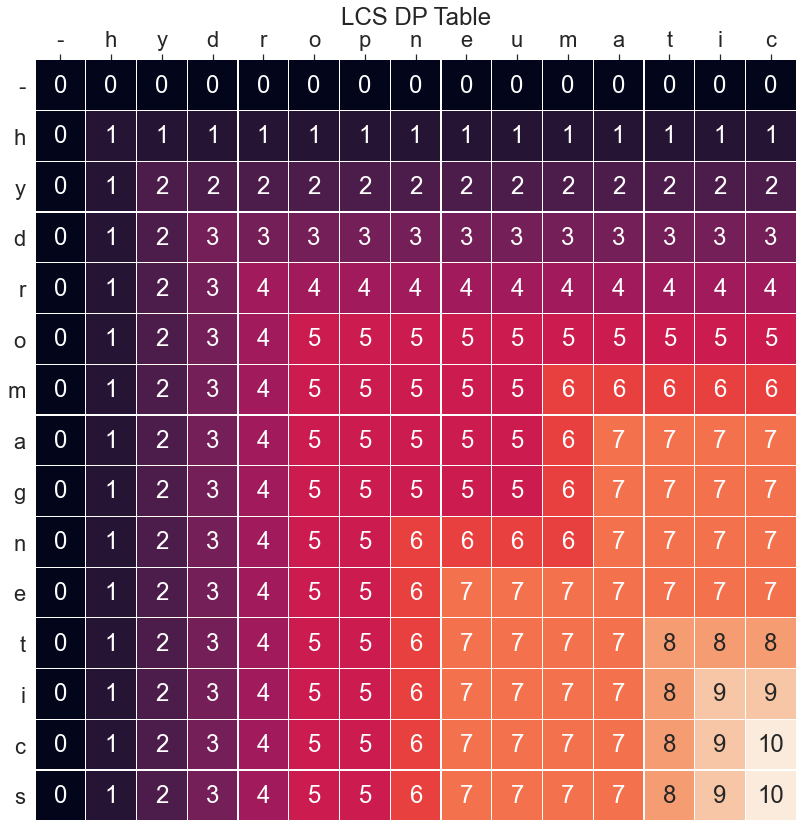

In [49]:
df = pd.DataFrame(dp, index=list('-' + text1), columns=list('-' + text2))

fig, ax = plt.subplots(figsize=(14, 14))
g = sns.heatmap(df, annot=True, linewidths=.2, ax=ax, square=True, cbar=False)
ax.xaxis.set_ticks_position('top')
sns.set(font_scale=2)
plt.yticks(rotation=0)
plt.title('LCS DP Table')

# Weighted graph

A weighted graph is interesting because it has little to do with whether the graph is directed, undirected, or contains cycles. At its core, a weighted graph is a graph whose edges have some sort of value that is associated with them. The value that is attached to an edge is what gives the edge its “weight”.

A common way to refer to the “weight” of a single edge is by thinking of it as the cost or distance between two nodes. In other words, to go from node a to node b has some sort of cost to it.
Or, if we think of the nodes like locations on a map, then the weight could instead be the distance between nodes $a$ and $b$. Continuing with the map metaphor, the “weight” of an edge can also represent the capacity of what can be transported, or what can be moved between two nodes, $a$ and $b$.

### Representation

Adjacency Matrix

- one difference from unweighted graphs: instead of being binary, $A_{ij}$ indicate weighted edge from `i -> j` with weight $A_{ij}$


    [0, 5, 14, 0, 0, 0, 0, 0, 0]
    [0, 0, 4, 0, 3, 0, 0, 0, 0]
    [0, 0, 0, 0, 0, 7, 0, 0, 0]
    [0, 0, 0, 0, 0, 0, 6, 6, 0]
    [0, 0, 0, 8, 0, 0, 0, 4, 0]
    [0, 6, 0, 0, 3, 0, 0, 6, 0]
    [0, 0, 0, 0, 0, 0, 0, 0, 10]
    [0, 0, 0, 0, 0, 0, 0, 0, 8]
    [0, 0, 0, 0, 0, 0, 0, 0, 0]

## Shortest Paths

|                  | Dijkstra                                                                       | Bellman-Ford                                                                                                                                                                                                                                                                                                                                            |
|------------------|--------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Description      | Can end up in infinite loop if negative weighted edges exist.                  | Bellman Ford algorithm works by overestimating the length of the path<br>from the starting vertex to all other vertices. Then it iteratively<br>relaxes those estimates by finding new paths that are shorter than<br>the previously overestimated paths. By doing this repeatedly for <br>all vertices, we can guarantee that the result is optimized.<br>Guaranteed to terminate. |
| Approach         | Greedy                                                                         | Dynamic Programming                                                                                                                                                                                                                                                                                                                                     |
| Difference       |                                                                                | Works with negative weighted edges (can detect negative cycles)                                                                                                                                                                                                                                                                                         |
| Time Complexity  | $O(|V|+|E| \log |V|)$<br>where, E is the number of edges and V is the number of vertices. | $O(|E||V|)$                                                                                                                                                                                                                                                                                                                                                   |
| Space Complexity | $O(V)$                                                                           | $O(V)$                                                                                                                                                                                                                                                                                                                                                    |
| Link             | - https://www.programiz.com/dsa/dijkstra-algorithm<br> - https://www.youtube.com/watch?v=_lHSawdgXpI                               | - https://www.programiz.com/dsa/bellman-ford-algorithm<br> - https://www.youtube.com/watch?v=obWXjtg0L64                                                                                                                                                                                                                                                                                                    |

However, Dijkstra's algorithm greedily selects the minimum-weight node that has not yet been processed, and performs this relaxation process on all of its outgoing edges; in contrast, the Bellman–Ford algorithm simply relaxes all the edges, and does this |V | − 1 times, where |V | is the number of vertices in the graph. In each of these repetitions, the number of vertices with correctly calculated distances grows, from which it follows that eventually all vertices will have their correct distances. This method allows the Bellman–Ford algorithm to be applied to a wider class of inputs than Dijkstra.

Dijkstra is however generally considered better in the absence of negative weight edges, as a typical binary heap priority queue implementation has O((|E|+|V|)log|V|) time complexity [A Fibonacci heap priority queue gives O(|V|log|V| + |E|)], while the Bellman-Ford algorithm has O(|V||E|) complexity

* Shortest paths differs from minimum spanning tree because the shortest distance between two vertices might not include all the vertices of the graph.

### Dijkstra's Algorithm

Dijkstra’s algorithm can be used to determine the shortest path from one node in a graph to every other node within the same graph data structure, provided that the nodes are reachable from the starting node.

This algorithm will continue to run until all of the reachable vertices in a graph have been visited, which means that we could run Dijkstra’s algorithm, find the shortest path between any two reachable nodes, and then save the results somewhere. Once we run Dijkstra’s algorithm just once, we can look up our results from our algorithm again and again — without having to actually run the algorithm itself!

- It differs from minimum spanning tree because the shortest distance between two vertices might not include all the vertices of the graph.

How Dijkstra's Algorithm works

Dijkstra's Algorithm works on the basis that any subpath `B -> D` of the shortest path `A -> D` between vertices `A` and `D` is also the shortest path between vertices `B` and `D`.

Djikstra used this property in the opposite direction i.e we overestimate the distance of each vertex from the starting vertex. Then we visit each node and its neighbours to find the shortest subpath to those neighbours.

### Analysis

- The algorithm uses a greedy approach in the sense that we find the next best solution hoping that the end result is the best solution for the whole problem.
- The shortest path between two vertices in a graph $G$ with $n$ vertices and $m$ edges can be computed in $O(m+n log(n))$ time.
- Or using heap-based priority queue implementation $O(m log(n))$.

### Links

- [Dijkstra's Shortest Path Algorithm | Brilliant Math & Science Wiki](https://brilliant.org/wiki/dijkstras-short-path-finder/)
- [Dijkstra's Algorithm](https://www.programiz.com/dsa/dijkstra-algorithm)
- [Dijkstra's Algorithm - Shortest paths with Dijkstra's Algorithm](https://www.codingame.com/playgrounds/1608/shortest-paths-with-dijkstras-algorithm/dijkstras-algorithm)
- [Finding The Shortest Path, With A Little Help From Dijkstra](https://medium.com/basecs/finding-the-shortest-path-with-a-little-help-from-dijkstra-613149fbdc8e)
- [https://www.youtube.com/watch?v=K_1urzWrzLs](https://www.youtube.com/watch?v=K_1urzWrzLs)

### Related

- [Greedy Algorithm](#Greedy-Algorithms)
- [Graph](#Graph)

In [8]:
# %load algorithms/graph_weighted.py

In [8]:
from algorithms.graph_weighted import WeightedGraph

print("\nWeighted Graph / Dijkstra's Shortest Path")
edges = [
    (0, 2, 9), (0, 6, 14), (0, 7, 15),
    (2, 3, 24), (3, 1, 19), (3, 5, 2),
    (4, 3, 6), (4, 1, 6), (5, 1, 16),
    (5, 4, 11), (6, 5, 30), (6, 7, 5),
    (6, 3, 18), (7, 5, 20), (7, 1, 44)
]
directed = True
graph = WeightedGraph.from_edges(edges, directed)
print('directed:', directed)

print('source -> dest, weight')
for src, dest, weight in sorted(graph.get_edges(), key=lambda x: x[0]):
    print(f'{src} -> {dest}, {weight}')

print('adjacency list')
adj_list = graph.get_adjacency_list()
for i, row in enumerate(adj_list):
    print(f'{i}: {row}')

print('\nadjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print('\nShortest distance:')
src = 0
dest = 1
print(graph.dijkstra_shortest_path(src, dest))


Weighted Graph / Dijkstra's Shortest Path
directed: True
source -> dest, weight
0 -> 2, 9
0 -> 7, 15
0 -> 6, 14
2 -> 3, 24
3 -> 1, 19
3 -> 5, 2
4 -> 1, 6
4 -> 3, 6
5 -> 1, 16
5 -> 4, 11
6 -> 5, 30
6 -> 3, 18
6 -> 7, 5
7 -> 1, 44
7 -> 5, 20
adjacency list
0: [2, 6, 7]
1: []
2: [3]
3: [1, 5]
4: [1, 3]
5: [1, 4]
6: [3, 5, 7]
7: [1, 5]

adjacency matrix
[0, 0, 9, 0, 0, 0, 14, 15]
[0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 24, 0, 0, 0, 0]
[0, 19, 0, 0, 0, 2, 0, 0]
[0, 6, 0, 6, 0, 0, 0, 0]
[0, 16, 0, 0, 11, 0, 0, 0]
[0, 0, 0, 18, 0, 30, 0, 5]
[0, 44, 0, 0, 0, 20, 0, 0]

Shortest distance:
50


### Bellman-Ford Algorithm

Bellman Ford algorithm helps us find the shortest path from a vertex to all other vertices of a weighted graph.
It is similar to [Dijkstra's algorithm](#Dijkstra's-Algorithm) but it can work with **graphs in which edges can have negative weights.**

Why would one ever have edges with negative weights in real life?
- Negative weight edges might seem useless at first but they can explain a lot of phenomena like cashflow, the heat released/absorbed in a chemical reaction, etc.
- For instance, if there are different ways to reach from one chemical A to another chemical B, each method will have sub-reactions involving both heat dissipation and absorption.
- If we want to find the set of reactions where minimum energy is required, then we will need to be able to factor in the heat absorption as negative weights and heat dissipation as positive weights.

Why do we need to be careful with negative weights?
- Negative weight edges can create negative weight cycles i.e. a cycle that will reduce the total path distance by coming back to the same point.
- Shortest path algorithms like Dijkstra's Algorithm that aren't able to detect such a cycle can give an incorrect result because they can go through a negative weight cycle and reduce the path length.

### Recurrence

$$
\operatorname{OPT}(v, i)=\left\{\begin{array}{cl}0 & \text { if } i=0 \text { and } v=s \\
\infty & \text { if } i=0 \text { and } v \neq s \\
\min \left\{\begin{array}{l}\mathrm{OPT}(v, i-1), \\
\min _{(u, v) \in E}\{\mathrm{OPT}(u, i-1)+w(u, v)\}\end{array}\right\}\end{array}\right.
$$


    dist[dest] = min(dist[dest], dist[src] + weight) if dist[src] != float('inf')


![img](img/bellman.png)

### Links
- https://www.programiz.com/dsa/bellman-ford-algorithm

### Related

- [Dynamic Programming](#Dynamic-Programming)
- [Graph](#Graph)

In [2]:
from algorithms.graph_weighted import WeightedGraph

In [3]:
edges = [
    (0, 1, 2), (0, 3, 7), (1, 2, 6),
    (1, 4, 7), (2, 0, -4), (2, 3, 5),
    (2, 4, 8), (3, 2, -2), (4, 0, 9),
    (4, 3, -3)
]
directed = True
graph = WeightedGraph.from_edges(edges, directed)

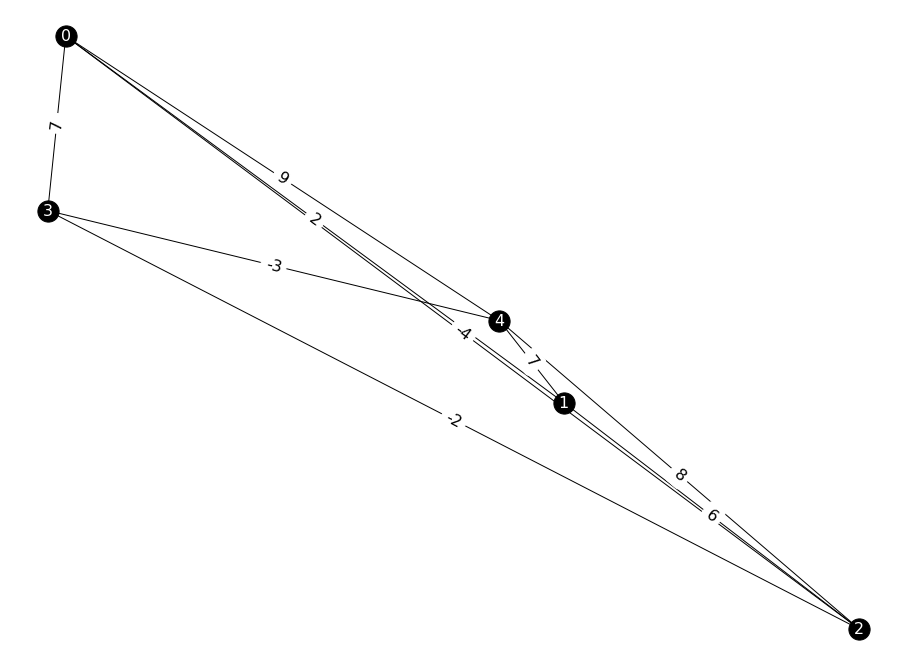

In [4]:
graph.plot()

In [5]:
dest = 0
s = [1, 2, 3, 4]

for src in s:
    dist = graph.bellman_ford(src, dest)
    print(f'{src} -> {dest}: {dist}')

1 -> 0: -2
2 -> 0: -4
3 -> 0: -6
4 -> 0: -9


## Minimum Spanning Tree (MST)

### Prim's Algorithm

Weighted undirected graph

https://www.youtube.com/watch?v=cplfcGZmX7I

In [16]:
# %load algorithms/prim.py

In [2]:
from algorithms.graph_weighted import WeightedGraph

adjacency_matrix = [
    [0, 9, 75, 0, 0],
    [9, 0, 95, 19, 42],
    [75, 95, 0, 51, 66],
    [0, 19, 51, 0, 31],
    [0, 42, 66, 31, 0]
]
directed = False
graph = WeightedGraph(adjacency_matrix, directed)
print('directed:', directed)

print('source -> dest, weight')
for src, dest, weight in sorted(graph.get_edges(), key=lambda x: x[0]):
    print(f'{src} -> {dest}, {weight}')

print('\nadjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print("\nPrim's Algorithm")
mst = graph.prim_mst()
for src, dest, weight in mst:
    print(f'{src} -> {dest}, {weight}')

directed: False
source -> dest, weight
0 -> 1, 9
0 -> 2, 75
1 -> 2, 95
1 -> 3, 19
1 -> 0, 9
1 -> 4, 42
2 -> 0, 75
2 -> 4, 66
2 -> 1, 95
2 -> 3, 51
3 -> 1, 19
3 -> 2, 51
3 -> 4, 31
4 -> 3, 31
4 -> 2, 66
4 -> 1, 42

adjacency matrix
[0, 9, 75, 0, 0]
[9, 0, 95, 19, 42]
[75, 95, 0, 51, 66]
[0, 19, 51, 0, 31]
[0, 42, 66, 31, 0]

Prim's Algorithm
0 -> 1, 9
1 -> 3, 19
3 -> 4, 31
3 -> 2, 51


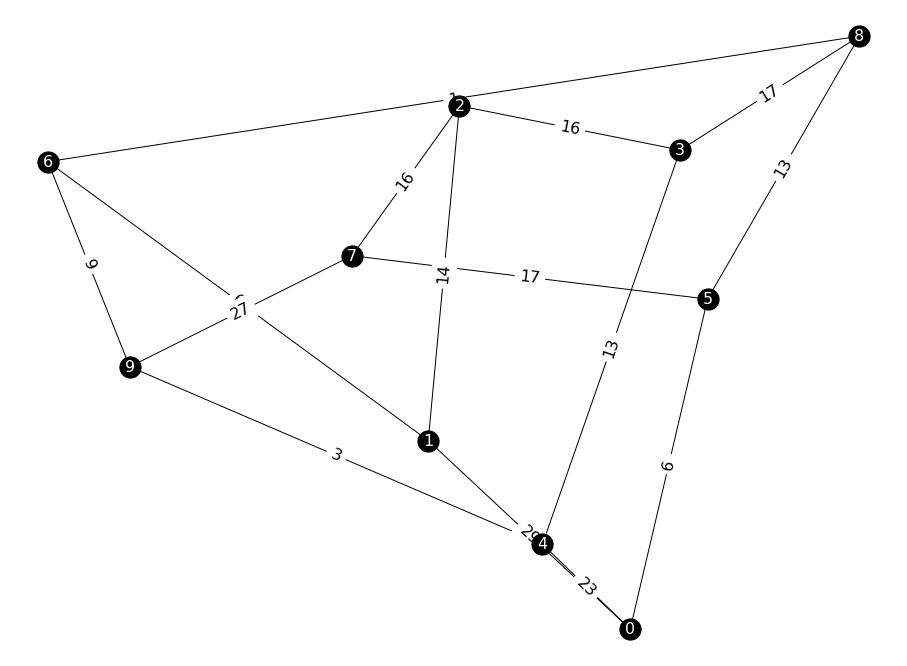

In [3]:
graph = WeightedGraph.generate_graph()
graph.plot()

In [4]:
print('directed:', directed)

print('source -> dest, weight')
for src, dest, weight in sorted(graph.get_edges(), key=lambda x: x[0]):
    print(f'{src} -> {dest}, {weight}')

print('\nadjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

print("\nPrim's Algorithm")
mst = graph.prim_mst()
for src, dest, weight in mst:
    print(f'{src} -> {dest}, {weight}')

directed: False
source -> dest, weight
0 -> 5, 6
0 -> 1, 29
0 -> 4, 23
1 -> 2, 14
1 -> 6, 6
1 -> 0, 29
2 -> 1, 14
2 -> 3, 16
2 -> 7, 16
3 -> 4, 13
3 -> 8, 17
3 -> 2, 16
4 -> 9, 3
4 -> 0, 23
4 -> 3, 13
5 -> 0, 6
5 -> 7, 17
5 -> 8, 13
6 -> 9, 9
6 -> 1, 6
6 -> 8, 1
7 -> 5, 17
7 -> 9, 27
7 -> 2, 16
8 -> 6, 1
8 -> 5, 13
8 -> 3, 17
9 -> 7, 27
9 -> 6, 9
9 -> 4, 3

adjacency matrix
[0, 29, 0, 0, 23, 6, 0, 0, 0, 0]
[29, 0, 14, 0, 0, 0, 6, 0, 0, 0]
[0, 14, 0, 16, 0, 0, 0, 16, 0, 0]
[0, 0, 16, 0, 13, 0, 0, 0, 17, 0]
[23, 0, 0, 13, 0, 0, 0, 0, 0, 3]
[6, 0, 0, 0, 0, 0, 0, 17, 13, 0]
[0, 6, 0, 0, 0, 0, 0, 0, 1, 9]
[0, 0, 16, 0, 0, 17, 0, 0, 0, 27]
[0, 0, 0, 17, 0, 13, 1, 0, 0, 0]
[0, 0, 0, 0, 3, 0, 9, 27, 0, 0]

Prim's Algorithm
0 -> 5, 6
5 -> 8, 13
8 -> 6, 1
6 -> 1, 6
6 -> 9, 9
9 -> 4, 3
4 -> 3, 13
1 -> 2, 14
2 -> 7, 16


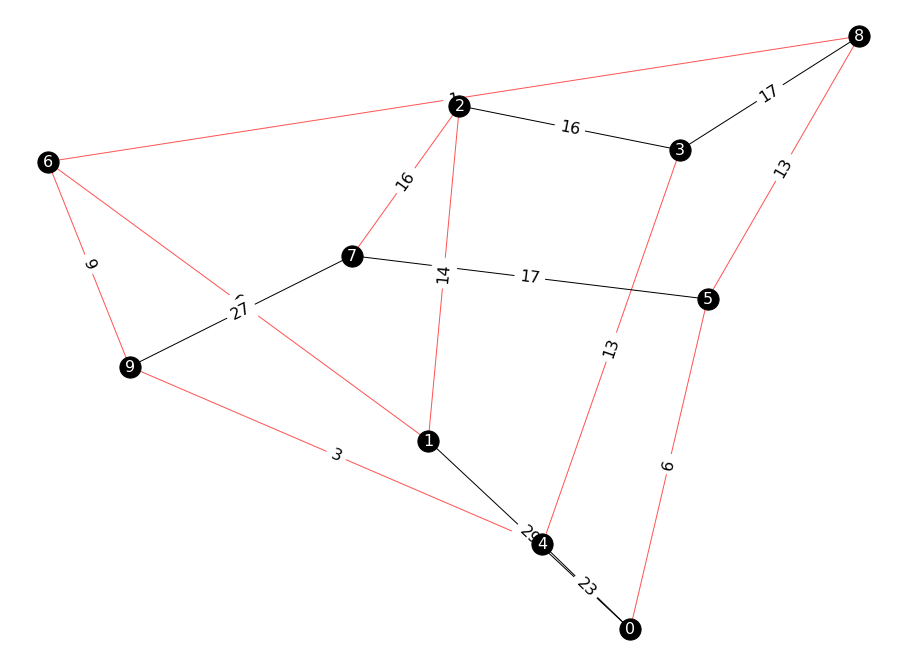

In [5]:
graph.plot(path_to_color=mst)

# Network Flows

- s-t cut: An s-t cut is a partition $(A, B)$ of $V$ with $s \in A$ and $t \in B$.
- capacity: The capacity of a cut $(A, B)$ is: $cap(A, B) = \sum c(e)$ for $e$ in edges going out from A.
- residual capacity: Remaining capacity (How much more flow can be pushed through)
- flow $f(A)=f_{out}(A)$: Arbitrary unit of commodity moving through the weighted directed edges, where the source of the edges are in some partition $A$ and destination are in partition $B$ (image 1). The image calls it s-t cut because the slide is referring to the capacity.
    - source node $s$ can push out as much flow as needed as long as it doesn't exceed the capacity of any edges
    - sink node $t$ can absorb as much flow as needed (then removed from the network)
    - convervation: $\forall \text{ nodes }v\in V:f_{in}(A)=f_{out}(A)$, except for source and sink ($s, t$) nodes
    - the **net flow** sent across any cut is equal to $f_{out}(s)$

image 1

![img](img/flow2.png)

image 2

![img](img/flow3.png)

## Residual Capacity

The residual capacity $r$ of a flow network $N$ and a flow $f$ is the difference between the capacity $c$ and the flow $f$. Formally, this is defined as

The residual capacity for a flow network $N$ and flow $f$ is a mapping $r: E \rightarrow \mathbb{R}_0^+$ such that

$$r(e)=c(e)-f(e) \\ \forall \text{ edges } e \in E$$

Setting each edge's weight to its residual capacity forms a residual graph for a flow network $N$ and flow $f$. This network models the available capacity for all edges, and is used as an intermediate calculation in the Ford-Fulkerson algorithm for solving the maximum flow problem.

## Max-flow Min-cut

Max-flow of network $N$ == Min-cut (minimum s-t cut) of network $N$

> The value of the max flow is equal to the value of the min cut. \[Ford-Fulkerson 1956\]

The max-flow min-cut theorem is a network flow theorem. This theorem states that the maximum flow through any network from a given source to a given sink is exactly the sum of the edge weights that, if removed, would totally disconnect the source from the sink. In other words, for any network graph and a selected source and sink node, the max-flow from source to sink = the min-cut necessary to separate source from sink. Flow can apply to anything. For instance, it could mean the amount of water that can pass through network pipes. Or, it could mean the amount of data that can pass through a computer network like the Internet.

Max-flow min-cut has a variety of applications. In computer science, networks rely heavily on this algorithm. Network reliability, availability, and connectivity use max-flow min-cut. In mathematics, matching in graphs (such as bipartite matching) uses this same algorithm. In less technical areas, this algorithm can be used in scheduling. For example, airlines use this to decide when to allow planes to leave airports to maximize the "flow" of flights.

image 4

![img](img/flow4.png)

image 5

![img](img/flow5.png)

image 6: Proof

![img](img/flow6.png)

## Ford-Fulkerson Algorithm

Weighted directed graph

The Ford-Fulkerson algorithm is an algorithm that tackles the max-flow min-cut problem. That is, given a network with vertices and edges between those vertices that have certain weights, how much "flow" can the network process at a time?

It was discovered in 1956 by Ford and Fulkerson. This algorithm is sometimes referred to as a method because parts of its protocol are not fully specified and can vary from implementation to implementation. An algorithm typically refers to a specific protocol for solving a problem, whereas a method is a more general approach to a problem.

- Ford Fulkerson $\approx$ Edmond's Karp

The Ford-Fulkerson algorithm assumes that the input will be a graph, $G$, along with a source vertex, $s$, and a sink vertex, $t$. The graph is any representation of a weighted graph where vertices are connected by edges of specified weights. There must also be a source vertex and sink vertex to understand the beginning and end of the flow network.

Ford-Fulkerson has a complexity of $O\big(|E| \cdot f^{*}\big),$, where $f^{*}$ is the maximum flow of the network. The Ford-Fulkerson algorithm was eventually improved upon by the Edmonds-Karp algorithm, which does the same thing in $O\big(V^2 \cdot E\big)$ time, independent of the maximum flow value.

### Intuiion

The intuition behind the algorithm is quite simple (even though the implementation details can obscure this). Imagine a flow network that is just a traffic network of cars. Each road can hold a certain number of cars. This can be illustrated by the following graphic.

![img](img/flow.png)

The intuition goes like this: as long as there is a path from the source to the sink that can take some flow the entire way, we send it. **This path is called an augmenting path.** We keep doing this until there are no more augmenting paths. In the image above, we could start by sending 2 cars along the topmost path (because only 2 cars can get through the last portion). Then we might send 3 cars along the bottom path for a total of 5 cars. Finally, we can send 2 more cars along the top path for two edges, send them down to bottom path and through to the sink. The total number of cars sent is now 7, and it is the maximum flow.

https://www.youtube.com/watch?v=Tl90tNtKvxs

https://www.programiz.com/dsa/ford-fulkerson-algorithm

https://brilliant.org/wiki/ford-fulkerson-algorithm/

### Augmenting Paths

> Augmenting path theorem: Flow f is a max flow if and only if there are no augmenting paths.

An augmenting path is a directed path in the residual network with unused capacity for every edge in that path. Formally, this is defined as

An augmenting path for a flow network $N$ and flow $f$ is a directed path $p$ starting at the source ss and ending at the sink $t$ such that the residual capacity $r$ for all edges on that path is nonzero. Specifically,

$p = (u_1, u_2, \dots, u_{k-1}, u_k)$ is a directed path with $u_1 = s$ and $u_k = t$ such that

$$r(e) = c(e) - f(e) \gt 0$$

$\forall \text{ edges } e = (u_i, u_{i+1})$ for $i = 1, \dots, k - 1$ in the path $p$.

Actually, it turns out that a flow network $N$ with flow $f$ is a maximum flow if and only if there is no augmenting path in the residual network. The 'if' part of this theorem, that a maximum flow has no augmenting paths, is clear since the existence of such a path implies the existence of a more maximal flow (by increasing the flow for all edges in the path by the minimum residual capacity along that path). The 'only if' part of this theorem, that exhaustion of augmenting paths implies maximality, is less intuitive, and is the key insight behind the Ford-Fulkerson algorithm.

Augmenting paths consists of:
- non-full, forward edges
- non-empty, backward edges

### Edmonds-Karp Algorithm

The Edmonds-Karp Algorithm is a specific implementation of the Ford-Fulkerson algorithm.

Ford-Fulkerson is sometimes called a method because some parts of its protocol are left unspecified. Edmonds-Karp, on the other hand, provides a full specification. Most importantly, it specifies that breadth-first search should be used to find the shortest paths during the intermediate stages of the program.

Edmonds-Karp improves the runtime of Ford-Fulkerson, which is $O\big(|E| \cdot f^{*}\big)$, to $O\big(|V| \cdot |E|^2\big)$. This improvement is important because it makes the runtime of Edmonds-Karp independent of the maximum flow of the network, $f^{*}$.

https://brilliant.org/wiki/edmonds-karp-algorithm/

In [6]:
# %load algorithms/ford_fulkerson.py

In [7]:
from algorithms.ford_fulkerson import WeightedGraph

adjacency_matrix = [
    [0, 5, 14, 0, 0, 0, 0, 0, 0], # s
    [0, 0, 4, 0, 3, 0, 0, 0, 0], # a
    [0, 0, 0, 0, 0, 7, 0, 0, 0], # b
    [0, 0, 0, 0, 0, 0, 6, 6, 0], # c
    [0, 0, 0, 8, 0, 0, 0, 4, 0], # d
    [0, 6, 0, 0, 3, 0, 0, 6, 0], # e
    [0, 0, 0, 0, 0, 0, 0, 0, 10], # f
    [0, 0, 0, 0, 0, 0, 0, 0, 8], # g
    [0, 0, 0, 0, 0, 0, 0, 0, 0] # t
]

graph = WeightedGraph(adjacency_matrix)


print('source -> dest, weight')
for src, dest, weight in sorted(graph.get_edges(), key=lambda x: x[0]):
    print(f'{src} -> {dest}, {weight}')

print('\nadjacency matrix')
for row in graph.adjacency_matrix:
    print(row)

source = 0 # s
sink = 8 # t
maxflow = graph.ford_fulkerson(source, sink)
print("\nMax Flow:", str(maxflow))

print('\nresidual graph')
for row in graph.adjacency_matrix:
    print(row)

source -> dest, weight
0 -> 2, 14
0 -> 1, 5
1 -> 2, 4
1 -> 4, 3
2 -> 5, 7
3 -> 7, 6
3 -> 6, 6
4 -> 3, 8
4 -> 7, 4
5 -> 7, 6
5 -> 1, 6
5 -> 4, 3
6 -> 8, 10
7 -> 8, 8

adjacency matrix
[0, 5, 14, 0, 0, 0, 0, 0, 0]
[0, 0, 4, 0, 3, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 7, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 6, 6, 0]
[0, 0, 0, 8, 0, 0, 0, 4, 0]
[0, 6, 0, 0, 3, 0, 0, 6, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 10]
[0, 0, 0, 0, 0, 0, 0, 0, 8]
[0, 0, 0, 0, 0, 0, 0, 0, 0]

Max Flow: 10

residual graph
[0, 2, 7, 0, 0, 0, 0, 0, 0]
[3, 0, 4, 0, 0, 0, 0, 0, 0]
[7, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 2, 0, 4, 6, 0]
[0, 3, 0, 6, 0, 2, 0, 1, 0]
[0, 6, 7, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 2, 0, 0, 0, 0, 8]
[0, 0, 0, 0, 3, 5, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 2, 8, 0]


## Bipartite Matching


Apply Max-flow algorithm such as Ford-Fulkerson / Edmonds-Karp.

Residual graph will show the matching result.

Source: X

Dest: Y

![img](img/bipartite.png)

![img](img/bipartite2.png)

https://www.youtube.com/watch?v=GhjwOiJ4SqU

# P vs NP

### 𝖯 = Problems with Efficient Algorithms for Finding Solutions

Assume that efficient algorithms means algorithms that use at most polynomial amount of computational resources. The main resource we care about is the worst-case running time of algorithms with respect to the input size, i.e. the number of basic steps an algorithm takes on an input of size 𝑛. The size of an input 𝑥 is 𝑛 if it takes 𝑛-bits of computer memory to store 𝑥, in which case we write |𝑥|=𝑛. So by efficient algorithms we mean algorithms that have polynomial worst-case running time.

> 𝖯 is the class of decision problems that can be solved efficiently,<br>i.e. decision problems which have polynomial-time algorithms.

More formally, we say a decision problem 𝑄 is in 𝖯 iff

there is an efficient algorithm 𝐴 such that
for all inputs 𝑥,

> if 𝑄(𝑥)=𝑌𝐸𝑆 then 𝐴(𝑥)=𝑌𝐸𝑆, <br> if 𝑄(𝑥)=𝑁𝑂 then 𝐴(𝑥)=𝑁𝑂.

I can simply write 𝐴(𝑥)=𝑄(𝑥) but I write it this way so we can compare it to the definition of 𝖭𝖯.


### 𝖭𝖯 = Problems with Efficient Algorithms for Verifying Proofs/Certificates/Witnesses

Sometimes we do not know any efficient way of finding the answer to a decision problem, however if someone tells us the answer and gives us a proof we can efficiently verify that the answer is correct by checking the proof to see if it is a valid proof. This is the idea behind the complexity class 𝖭𝖯.

If the proof is too long it is not really useful, it can take too long to just read the proof let alone check if it is valid. We want the time required for verification to be reasonable in the size of the original input, not the size of the given proof! This means what we really want is not arbitrary long proofs but short proofs. Note that if the verifier's running time is polynomial in the size of the original input then it can only read a polynomial part of the proof. So by short we mean of polynomial size.

Here is an example of a problem which we do not know how to solve efficiently but we can efficiently verify proofs:

> Partition<br>
Input: a finite set of natural numbers 𝑆,<br>
Question: is it possible to partition 𝑆 into two sets 𝐴 and 𝐵 (𝐴∪𝐵=𝑆 and 𝐴∩𝐵=∅)<br>
such that the sum of the numbers in 𝐴 is equal to the sum of number in $B\left(\sum_{x\in A}x = \sum_{x \in B}x\right)?$

If I give you 𝑆 and ask you if we can partition it into two sets such that their sums are equal, you do not know any efficient algorithm to solve it. You will probably try all possible ways of partitioning the numbers into two sets until you find a partition where the sums are equal or until you have tried all possible partitions and none has worked. If any of them worked you would say YES, otherwise you would say NO.

But there are exponentially many possible partitions so it will take a lot of time. However if I give you two sets 𝐴 and 𝐵, you can easily check if the sums are equal and if 𝐴 and 𝐵 is a partition of 𝑆. Note that we can compute sums efficiently.

Here the pair of 𝐴 and 𝐵 that I give you is a proof for a YES answer. You can efficiently verify my claim by looking at my proof and checking if it is a valid proof. If the answer is YES then there is a valid proof, and I can give it to you and you can verify it efficiently. If the answer is NO then there is no valid proof. So whatever I give you you can check and see it is not a valid proof. I cannot trick you by an invalid proof that the answer is YES. Recall that if the proof is too big it will take a lot of time to verify it, we do not want this to happen, so we only care about efficient proofs, i.e. proofs which have polynomial size.

Sometimes people use "certificate" or "witness" in place of "proof".

Note I am giving you enough information about the answer for a given input 𝑥 so that you can find and verify the answer efficiently. For example, in our partition example I do not tell you the answer, I just give you a partition, and you can check if it is valid or not. Note that you have to verify the answer yourself, you cannot trust me about what I say. Moreover you can only check the correctness of my proof. If my proof is valid it means the answer is YES. But if my proof is invalid it does not mean the answer is NO. You have seen that one proof was invalid, not that there are no valid proofs. We are talking about proofs for YES. We are not talking about proofs for NO.

Let us look at an example: 𝐴={2,4} and 𝐵={1,5} is a proof that 𝑆={1,2,4,5} can be partitioned into two sets with equal sums. We just need to sum up the numbers in 𝐴 and the numbers in 𝐵 and see if the results are equal, and check if 𝐴, 𝐵 is partition of 𝑆.

> 𝖭𝖯 is the class of problems which have efficient verifiers, i.e.<br>
there is a polynomial time algorithm that can verify if a given solution is correct.

More formally, we say a decision problem 𝑄 is in 𝖭𝖯 iff

>there is an efficient algorithm 𝑉 called verifier such that
for all inputs 𝑥,
> - if 𝑄(𝑥)=𝑌𝐸𝑆 then there is a proof 𝑦 such that 𝑉(𝑥,𝑦)=𝑌𝐸𝑆,
> - if 𝑄(𝑥)=𝑁𝑂 then for all proofs 𝑦, 𝑉(𝑥,𝑦)=𝑁𝑂.

We say a verifier is sound if it does not accept any proof when the answer is NO. In other words, a sound verifier cannot be tricked to accept a proof if the answer is really NO. No false positives.

Similarly, we say a verifier is complete if it accepts at least one proof when the answer is YES. In other words, a complete verifier can be convinced of the answer being YES.

The terminology comes from logic and proof systems. We cannot use a sound proof system to prove any false statements. We can use a complete proof system to prove all true statements.

The verifier 𝑉 gets two inputs,

- 𝑥 : the original input for 𝑄, and
- 𝑦 : a suggested proof for 𝑄(𝑥)=𝑌𝐸𝑆.

Note that we want 𝑉 to be efficient in the size of 𝑥. If 𝑦 is a big proof the verifier will be able to read only a polynomial part of 𝑦. That is why we require the proofs to be short. If 𝑦 is short saying that 𝑉 is efficient in 𝑥 is the same as saying that 𝑉 is efficient in 𝑥 and 𝑦 (because the size of 𝑦 is bounded by a fixed polynomial in the size of 𝑥).

In summary, to show that a decision problem 𝑄 is in 𝖭𝖯 we have to give an efficient verifier algorithm which is sound and complete.

### P$\subseteq$NP
Therefore we have 𝖯=efficient solvable and 𝖭𝖯=efficiently verifiable. So 𝖯=𝖭𝖯 iff the problems that can be efficiently verified are the same as the problems that can be efficiently solved.

Note that any problem in 𝖯 is also in 𝖭𝖯, i.e. if you can solve the problem you can also verify if a given proof is correct: the verifier will just ignore the proof!

That is because we do not need it, the verifier can compute the answer by itself, it can decide if the answer is YES or NO without any help. If the answer is NO we know there should be no proofs and our verifier will just reject every suggested proof. If the answer is YES, there should be a proof, and in fact we will just accept anything as a proof.

### Reductions: Solving a Problem Using Another Problem as a Subroutine/Oracle/Black Box

The idea of a reduction is very simple: to solve a problem, use an algorithm for another problem.

$X\le_{P}Y$: Problem $X$ can be polynomially reduced to problem $Y$, if arbitrary instances of problem $X$ can be solved using
- Polynomial number of standard computational steps, plus
- Polynomial number of calls to an oracle that solves problem $Y$

Example: Transitive closure of a directed graph can be computed by $n$ calls to BFS + the time t obuild the transitive closure

$$TC\le_{P} BFS$$

- If $X\le_{P}Y$ and $Y$ can be solved in polynomial-time, then$X$ can also be solved in polynomial time.
- If $X\le_{P}Y$ and $X$ cannot be solved in polynomial-time, then $Y$ cannot be solved in polynomial time.

E.g.
- Transitive closure reduces to breadth-first search
- Bipartite matching reduces to max flow
- Max flow reduces to min cut

